# CH1. EDA

이어서 이진 데이터, 범주형 데이터 탐색을 한다.

##### 주요 용어 정리

> 최빈값(mode): 데이터에서 가장 자주 등장하는 범주 혹은 값

> 기댓값(expected value): 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률(probability)에 따른 평균

> 막대도표(bar chart): 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림

> 파이그림(pie chart): 각 범주의 빈도수 혹은 비율을 원의 부채꼴 형태로 나타낸 그림

---

##### 요약

> 범주형 데이터: 보통 비율로 요약할 수 있고 막대도표를 사용해서 시각화한다.

> 범주란 전혀 다른 집합(a와 b, 혹은 물과 주스 등), 정도를 나타내는 요인변수의 수준(상중하), 구간별로 나뉜 수치 데이터 같은 것들을 의미한다.

> 기댓값은 어떤 값과 그 값이 일어날 확률을 서로 곱해 더한 값을의미한다. 주로 요인변수의 수준을 요약하는 데에 사용된다.


In [1]:
# 라이브러리 불러오기

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

## 데이터 import

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# 이진 데이터와 범주 데이터 탐색하기

데이터 가져오는 건 원래 파일 참고.

이진변수나 범주가 몇 개 안되는 범주형 변수를 분석할때,

이진 변수의 경우는 1과 같이 중요한 범주의 비율이 어느 정도 되는지 알아본다.

항공기 운행이 지연된 원인별 퍼센트 비율을 보이도록한다.



## 이진 데이터 분석하기 

##### 댈러스 - 포트워스 공항의 항공기 운행 지연 원인별 퍼센트 비율

지연의 원인은 항공기 기체 관련 문제, 항공교통 관제 시스템 지연, 날씨, 보안, 귀향 항공기 지연으로 나누어져있다.

In [5]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


전체를 100으로 했을 떄 각 요인 별 비중을 나타낸다.

In [6]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


## 막대도표

어떤 범주형 자료를 보여줄 때 주로 사용된다.

x축 위에 각 범주들 즉 요인 변수의 서로 다른 범주들을 나타내고, y축은 각 범주에 해당하는 횟수나 비율을 표시한다.

히스토그램은 그와 달리 x축은 수치적으로 나타낼 수 있는 하나의 변수의 값을 의미하는 점에서 다르다. 

히스토그램에서 막대들은 중간에 빈 곳은 그 부분에 해당하는 값들이 존재하지 않는 것을 의미하나, 막대 도표은 서로다른 범주를 뜻하기 때문에 일반적으로 서로 떨어져 있다.

> 구간별로 나누어 그리는 히스토그램은 수치 데이터를,  순서를 고려한 하나의 요인으로 간주했다고 생각하면 된다. 수치형 데이터를 범주형으로 변환하는 것은 데이터의 복잡도를 줄여준다는 점에서 중요하며, 데이터 분석을 시작하는 단계에서 피처들 사이의 관계를 알아보기 위해 사용된다.

막대 도표 대신 파이차트를 사용하기도 하지만 시각적으로 효과적이지 않은 이유로 잘 사용하지 않는다.

---

barplot을 만들어보기로 한다.



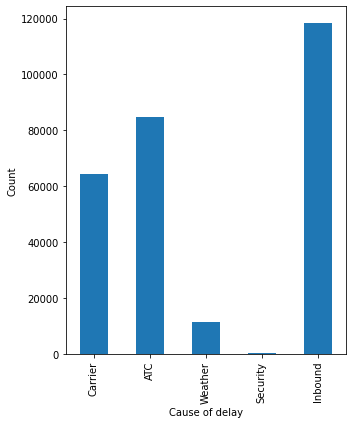

In [9]:
cause_delay = dfw.transpose().plot.bar(figsize=(5, 6), legend = False)    # 데이터 원본을 전치시켜서 각 범주를 행으로 바꾼다.
cause_delay.set_xlabel('Cause of delay')                                  # X축 범주 이름
cause_delay.set_ylabel('Count')                                           # y축 범주 이름

plt.tight_layout()                                                        # subplot을 그릴 때 여백을 줄이는 것으로 사료됨.
plt.show()

### seaborn 으로 bar chart 그리기

<AxesSubplot:>

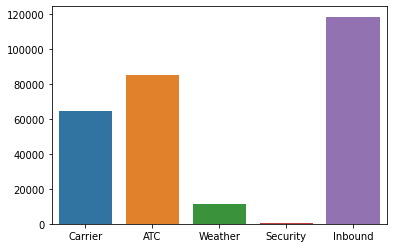

In [13]:
sns.barplot(data = dfw)

## 최빈값

데이터에서 가장 자주 등장하는 값 혹은 값들을 의미한다.

댈러스-포트워스 공항의 지연 원인 들 중 최빈값은 '귀향편 지연(inbound)'이다. 

범주형 데이터를 분석하는데 간단히 사용되나 수치형 데이터에는 잘 사용하지 않는다.

In [15]:
dfw.describe()

,Carrier,ATC,Weather,Security,Inbound
count,1.00,1.0,1.00,1.00,1.00
mean,64263.16,84856.5,11235.42,343.15,118427.82
std,NaN,NaN,NaN,NaN,NaN
min,64263.16,84856.5,11235.42,343.15,118427.82
25%,64263.16,84856.5,11235.42,343.15,118427.82
50%,64263.16,84856.5,11235.42,343.15,118427.82
75%,64263.16,84856.5,11235.42,343.15,118427.82
max,64263.16,84856.5,11235.42,343.15,118427.82


범주형 변수에서 freq 를 보면 되기에, 간단하게 describe 함수를 쓸 수 있지만 예시 데이터가 적절하지 못하다. ㅎㅎ;

## 기대값

##### 각 결괏값과 발생 확률을 곱하여 모두 더한다.

범주형 데이터 중 각 범주에 해당하는 수치형 변수들이 존재하는 특별한 경우가 있을 수 있다.

예를 들어 특정 클래스가 10, 20, 30 이라고 했을 때 그를 이용하는 비율이 각각 15% 30% 55% 이런 식으로!

$ EV = 10*0.15 + 20*0.3 + 30*0.55 $

이때 기댓값을 추출할 수 있다.

가중치가 해당 확률이 되는 가중 평균이 바로 이 기댓값이다.

기댓값은 실제 사업 평가나 자본 예산에 가장 근본적인 토대가 된다.

## 확률

확률에 대한 정의는 많은 개념이 존재하지만, 간단하게 생각하기.

> 사건이 발생할 확률 = 상황이 수없이 반복될 경우 사건이 발생할 비율